## Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

import pandas as pd
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plot
import seaborn as sea_b
import matplotlib as mp

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor


### Importing CSV Files

Importing the CSV file collected data provided (by the client both the train and test to investigate and compare.

In [2]:

Train_data    = pd.read_csv('CE802_P3_Data.csv')
Test_data     = pd.read_csv('CE802_P3_Test.csv')


### Investigation
Here we are going through the data we can see what call changes and preprocessing we may have to do so that we can make change for traing prediction method.

In [3]:

print("===============Training Data===================")
print("\n")
Train_data.info()
print("\n")
print("===============================================")
print("\n")
print("================Testing Data===================")
print("\n")
Test_data.info()
print("\n")
print("===============================================")


===============Training Data===================


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   object 
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   

================================================================================================
So upon studying the data we can see that the data has catogorical data, that being the features F5 and F34. Now we will be finding what all unique values thats their in the these columns.
================================================================================================

In [4]:
print(Train_data.F5.unique())
print(Train_data.F34.unique())

['Very high' 'Low' 'Very low' 'Medium' 'High']
['USA' 'Europe' 'UK' 'Rest']


================================================================================================
Replacing the unique values with integers and checking the whether the made change has took effect in the data
================================================================================================

In [5]:

cleanup = {"F5": {"Very low":0, "Low":1, "Medium":2, "High":3, "Very high":4},
          "F34": {"USA":0, "Europe":1, "UK":2, "Rest":3}
          }

Train_data.replace(cleanup, inplace=True)
Train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   int64  
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

================================================================================================
Splitting the data to input and output then ploting it to a heatmap so we can see the correlation between all the fetures so we can determine what all should be use in for the prediction process
================================================================================================

<AxesSubplot:>

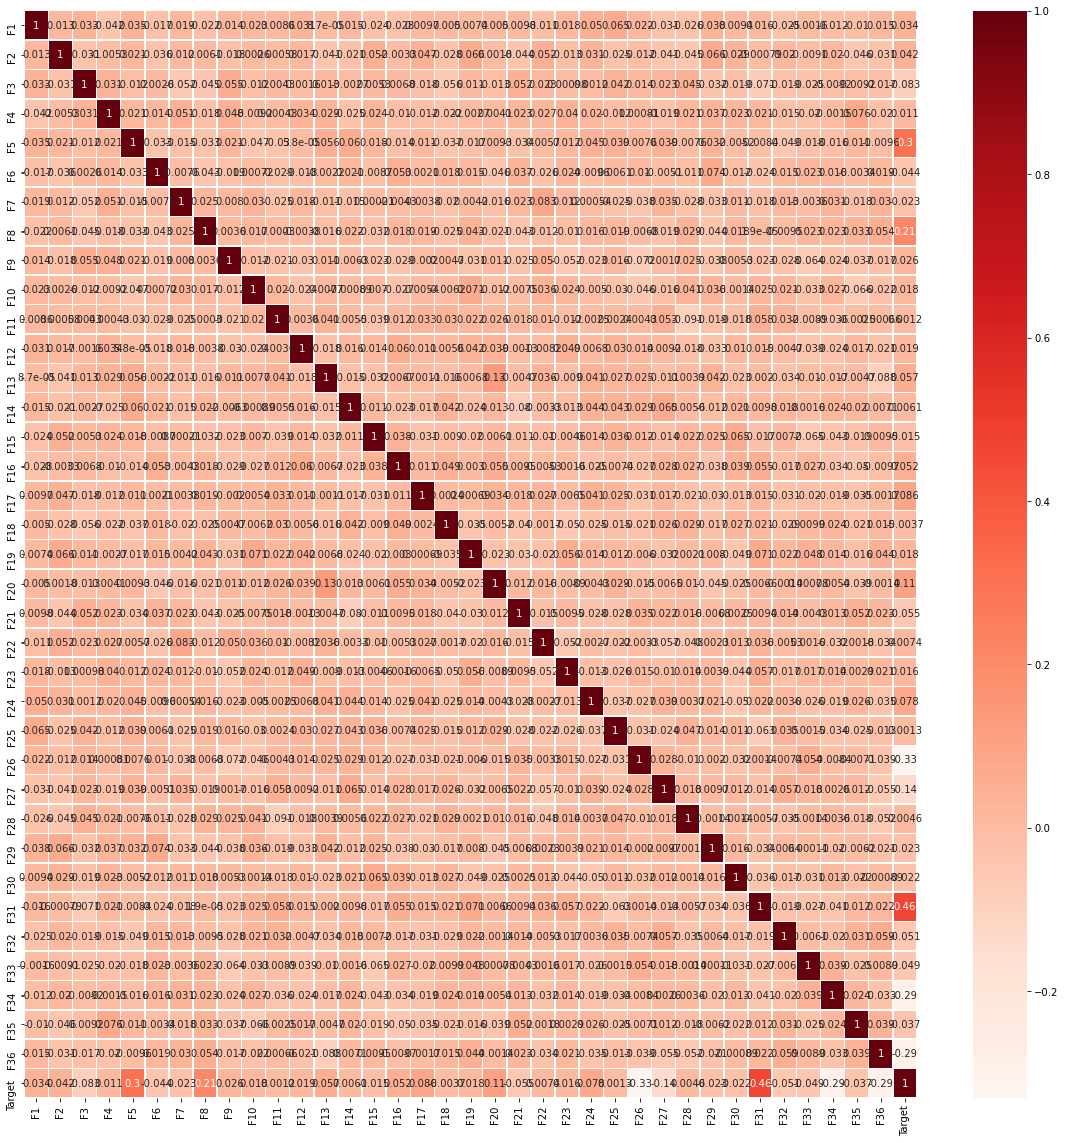

In [6]:
Train_data_in  = Train_data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11','F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21','F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31','F32', 'F33', 'F34', 'F35', 'F36']]
Train_data_out = Train_data['Target']

plot.subplots(figsize=(20,20))
sea_b.heatmap(Train_data.corr(), annot=True, linewidths= 0.5, cmap="Reds")

upon determining that all the fetures are to be considerd while predicting the output we move ahead and split it to training and testin the data set for both input and out. From here on out we will be variables will be called as follows

1. Train_datasplit         - Training data input
2. Train_datasplit_testin  - Testing data input
4. Train_datasplit_out     - Training data output
2. Train_datasplit_testout - Testing data output

In [7]:
Train_datasplit,Train_datasplit_testin,Train_datasplit_out,Train_datasplit_testout = train_test_split(Train_data_in, Train_data_out, test_size=0.33)

# Training and Prediction

<br>

Here we will be investigating the for different ML regresion techniques that being

<br>1. Linear Regression
<br>2 .Ridge Regression
<br>3 .Random Forest Regression
<br>4 .Gradient Boosting Regression

Based upon the the factors such as r2 score,MSE and RMSE values we will be determining what ML technique we will be using inorder to predict the expected annual profit for the test data.  

### Linear Regression

In [8]:
Linear_Regression = LinearRegression()

Linear_Regression.fit(Train_datasplit,Train_datasplit_out)

Linear_Regression_Predictions_Train = Linear_Regression.predict(Train_datasplit)

Linear_Regression_Predictions_Test  = Linear_Regression.predict(Train_datasplit_testin)

print("TRAINING SAMPLE")
print("Linear Regression - r2 Score :",Linear_Regression.score(Train_datasplit,Train_datasplit_out))
print("Linear Regression - MSE      :",mean_squared_error(Train_datasplit_out,Linear_Regression_Predictions_Train))
print("Linear Regression - RMSE     :",np.sqrt(mean_squared_error(Train_datasplit_out,Linear_Regression_Predictions_Train)))


print("TESTING SAMPLE")
print("Linear Regression - r2 Score :",Linear_Regression.score(Train_datasplit_testin,Train_datasplit_testout))
print("Linear Regression - MSE      :",mean_squared_error(Train_datasplit_testout,Linear_Regression_Predictions_Test))
print("Linear Regression - RMSE     :",np.sqrt(mean_squared_error(Train_datasplit_testout,Linear_Regression_Predictions_Test)))

TRAINING SAMPLE
Linear Regression - r2 Score : 0.7140187042292847
Linear Regression - MSE      : 418298.7963848803
Linear Regression - RMSE     : 646.7602309858579
TESTING SAMPLE
Linear Regression - r2 Score : 0.6095804986560038
Linear Regression - MSE      : 608185.3108314777
Linear Regression - RMSE     : 779.8623665952075


C:\Users\jjjoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target'>

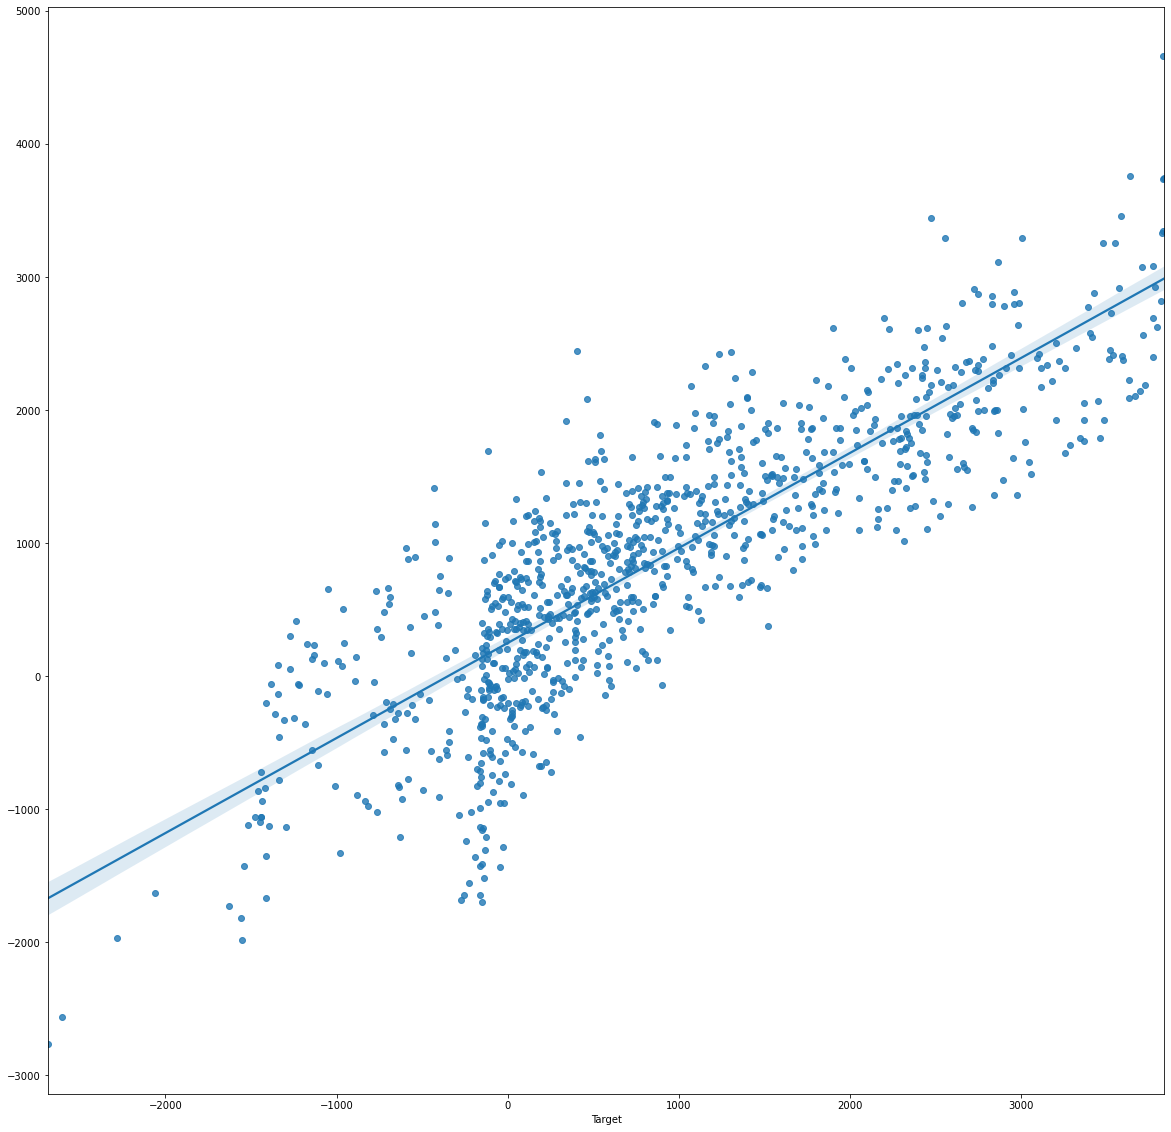

In [9]:
plot.subplots(figsize = (20,20))
sea_b.regplot(Train_datasplit_out,Linear_Regression_Predictions_Train)

### Ridge Regression

In [10]:
Ridge_Regression = Ridge()

Ridge_Regression.fit(Train_datasplit,Train_datasplit_out)

Ridge_Regression_Predictions_Train = Ridge_Regression.predict(Train_datasplit)

Ridge_Regression_Predictions_Test  = Ridge_Regression.predict(Train_datasplit_testin)

print("TRAINING SAMPLE")
print("Ridge Regression - r2 Score :",Ridge_Regression.score(Train_datasplit,Train_datasplit_out))
print("Ridge Regression - MSE      :",mean_squared_error(Train_datasplit_out,Ridge_Regression_Predictions_Train))
print("Ridge Regression - RMSE     :",np.sqrt(mean_squared_error(Train_datasplit_out,Ridge_Regression_Predictions_Train)))


print("TESTING SAMPLE")
print("Ridge Regression - r2 Score :",Ridge_Regression.score(Train_datasplit_testin,Train_datasplit_testout))
print("Ridge Regression - MSE      :",mean_squared_error(Train_datasplit_testout,Ridge_Regression_Predictions_Test))
print("Ridge Regression - RMSE     :",np.sqrt(mean_squared_error(Train_datasplit_testout,Ridge_Regression_Predictions_Test)))

TRAINING SAMPLE
Ridge Regression - r2 Score : 0.7140186249656082
Ridge Regression - MSE      : 418298.91232218454
Ridge Regression - RMSE     : 646.7603206151291
TESTING SAMPLE
Ridge Regression - r2 Score : 0.6095464504213657
Ridge Regression - MSE      : 608238.3502828766
Ridge Regression - RMSE     : 779.8963715025712


C:\Users\jjjoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jjjoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target'>

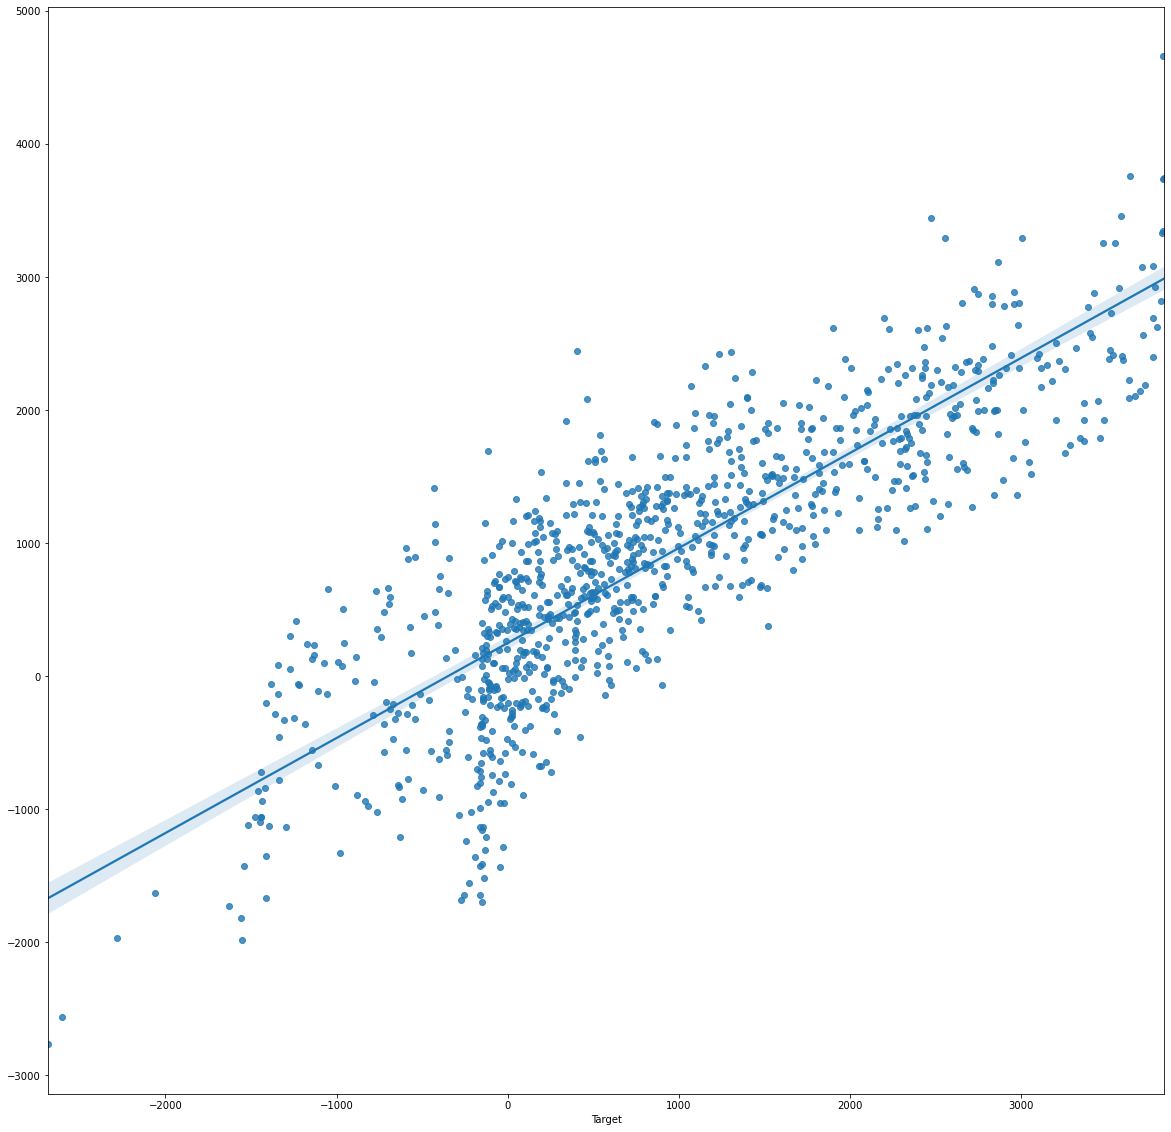

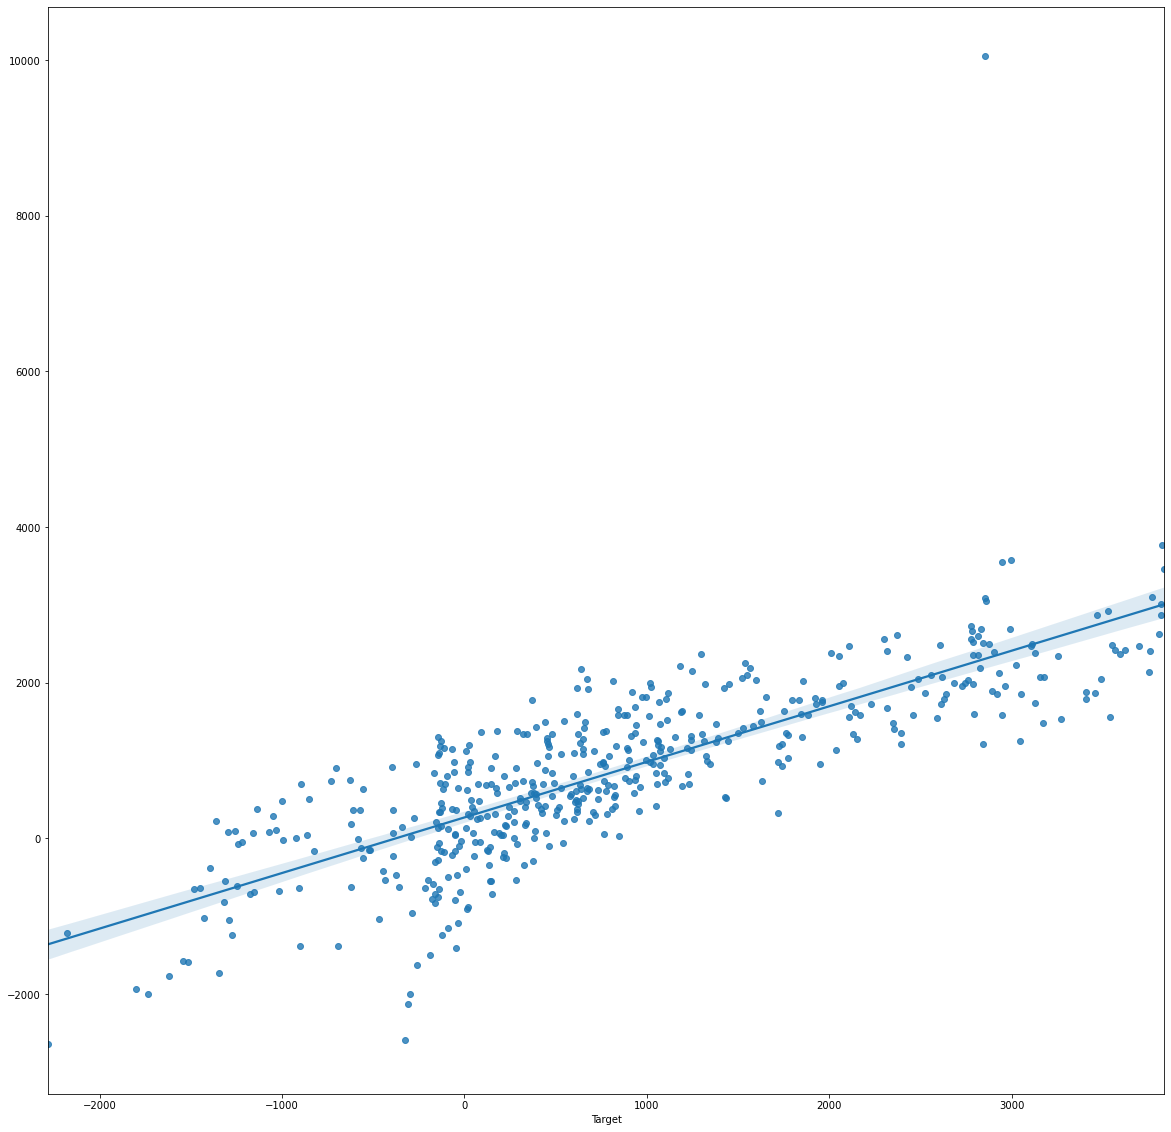

In [11]:
plot.subplots(figsize = (20,20))
sea_b.regplot(Train_datasplit_out,Ridge_Regression_Predictions_Train)

plot.subplots(figsize = (20,20))
sea_b.regplot(Train_datasplit_testout,Ridge_Regression_Predictions_Test)



### Random Forest Regression

In [12]:
Random_Forest_Regression = RandomForestRegressor(n_estimators = 100, random_state = 0)

Random_Forest_Regression.fit(Train_datasplit,Train_datasplit_out)

Random_Forest_Regression_Predictions_Train = Random_Forest_Regression.predict(Train_datasplit)

Random_Forest_Regression_Predictions_Test  = Random_Forest_Regression.predict(Train_datasplit_testin)

print("TRAINING SAMPLE")
print("Random Forest Regression - r2 Score :",Random_Forest_Regression.score(Train_datasplit,Train_datasplit_out))
print("Random Forest Regression - MSE      :",mean_squared_error(Train_datasplit_out,Random_Forest_Regression_Predictions_Train))
print("Random Forest Regression - RMSE     :",np.sqrt(mean_squared_error(Train_datasplit_out,Random_Forest_Regression_Predictions_Train)))


print("TESTING SAMPLE")
print("Random Forest Regression - r2 Score :",Random_Forest_Regression.score(Train_datasplit_testin,Train_datasplit_testout))
print("Random Forest Regression - MSE      :",mean_squared_error(Train_datasplit_testout,Random_Forest_Regression_Predictions_Test))
print("Random Forest Regression - RMSE     :",np.sqrt(mean_squared_error(Train_datasplit_testout,Random_Forest_Regression_Predictions_Test)))

TRAINING SAMPLE
Random Forest Regression - r2 Score : 0.9506047636968045
Random Forest Regression - MSE      : 72249.36804726948
Random Forest Regression - RMSE     : 268.7924255764464
TESTING SAMPLE
Random Forest Regression - r2 Score : 0.6575408073639273
Random Forest Regression - MSE      : 533473.9934954064
Random Forest Regression - RMSE     : 730.3930404209821


C:\Users\jjjoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jjjoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target'>

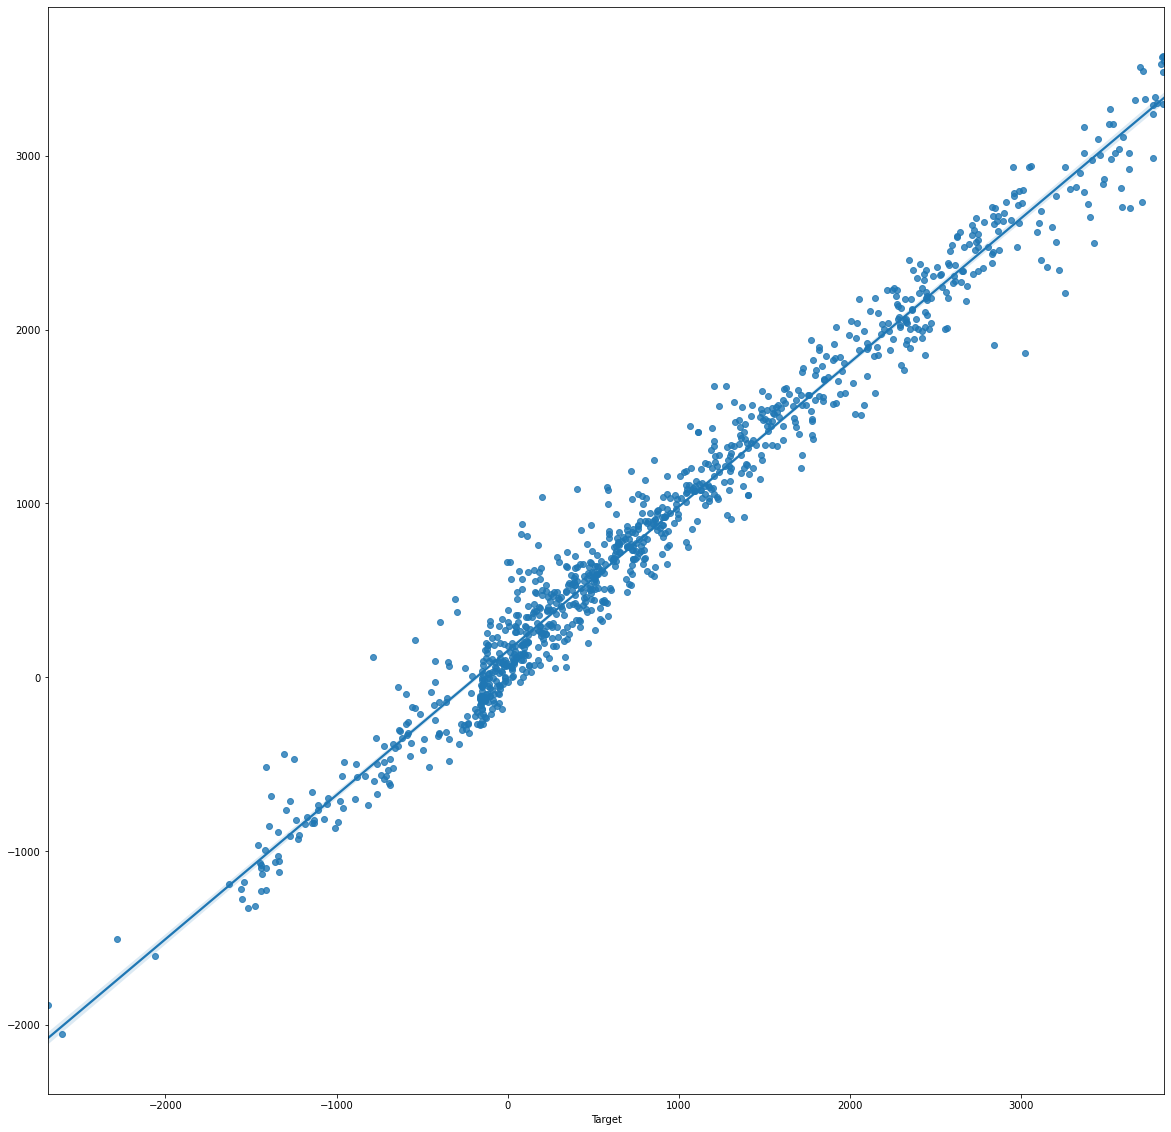

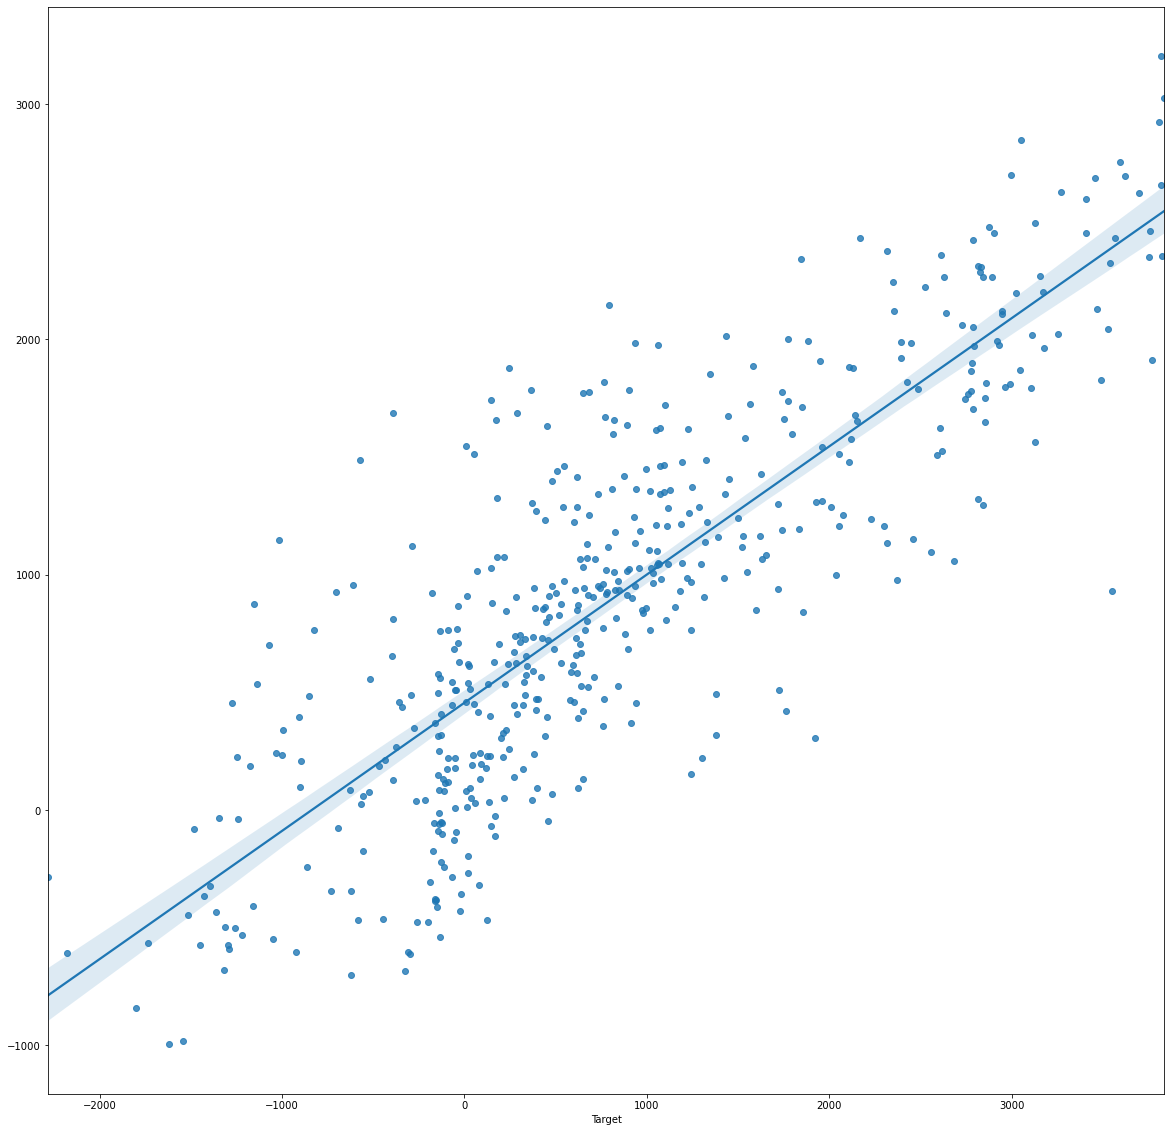

In [13]:

plot.subplots(figsize = (20,20))
sea_b.regplot(Train_datasplit_out,Random_Forest_Regression_Predictions_Train)

plot.subplots(figsize = (20,20))
sea_b.regplot(Train_datasplit_testout,Random_Forest_Regression_Predictions_Test)


### Gradient Boosting Regression

In [14]:
Gradient_Boosting_Regression = GradientBoostingRegressor(n_estimators=700, max_depth=3,learning_rate=0.06,min_samples_split=6)

Gradient_Boosting_Regression.fit(Train_datasplit,Train_datasplit_out)

Gradient_Boosting_Regression_Predictions_Train = Gradient_Boosting_Regression.predict(Train_datasplit)

Gradient_Boosting_Regression_Predictions_Test  = Gradient_Boosting_Regression.predict(Train_datasplit_testin)

print("TRAINING SAMPLE")
print("Gradient Boosting Regression - r2 Score :",Gradient_Boosting_Regression.score(Train_datasplit,Train_datasplit_out))
print("Gradient Boosting Regression - MSE      :",mean_squared_error(Train_datasplit_out,Gradient_Boosting_Regression_Predictions_Train))
print("Gradient Boosting Regression - RMSE     :",np.sqrt(mean_squared_error(Train_datasplit_out,Gradient_Boosting_Regression_Predictions_Train)))


print("TESTING SAMPLE")
print("Gradient Boosting Regression - r2 Score :",Gradient_Boosting_Regression.score(Train_datasplit_testin,Train_datasplit_testout))
print("Gradient Boosting Regression - MSE      :",mean_squared_error(Train_datasplit_testout,Gradient_Boosting_Regression_Predictions_Test))
print("Gradient Boosting Regression - RMSE     :",np.sqrt(mean_squared_error(Train_datasplit_testout,Gradient_Boosting_Regression_Predictions_Test)))

TRAINING SAMPLE
Gradient Boosting Regression - r2 Score : 0.9915010445264529
Gradient Boosting Regression - MSE      : 12431.242524209414
Gradient Boosting Regression - RMSE     : 111.49548207981081
TESTING SAMPLE
Gradient Boosting Regression - r2 Score : 0.8520961972574272
Gradient Boosting Regression - MSE      : 230400.68422425503
Gradient Boosting Regression - RMSE     : 480.00071273306986


C:\Users\jjjoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jjjoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target'>

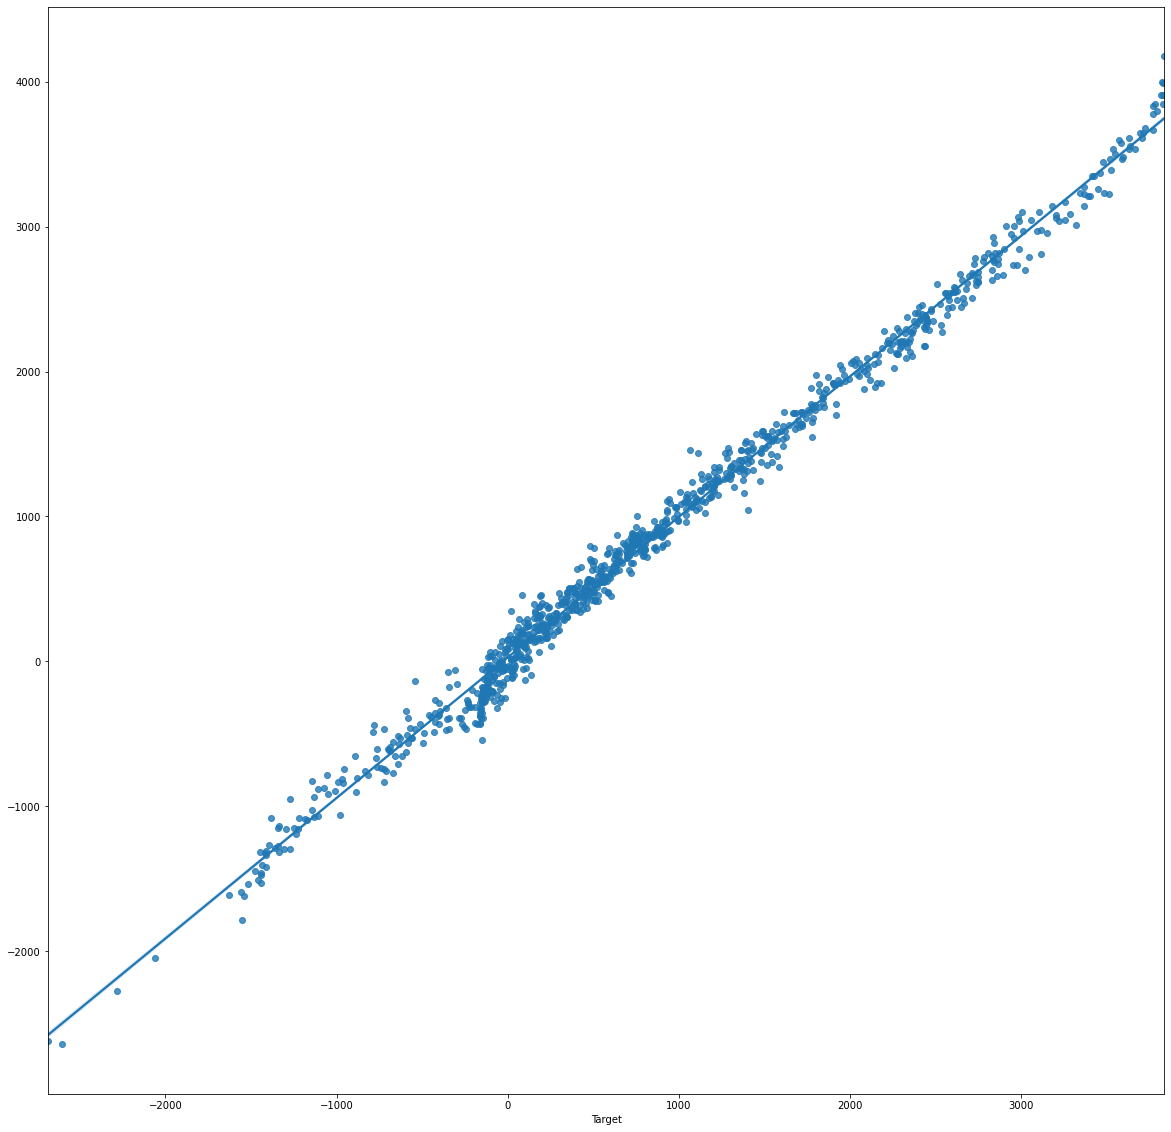

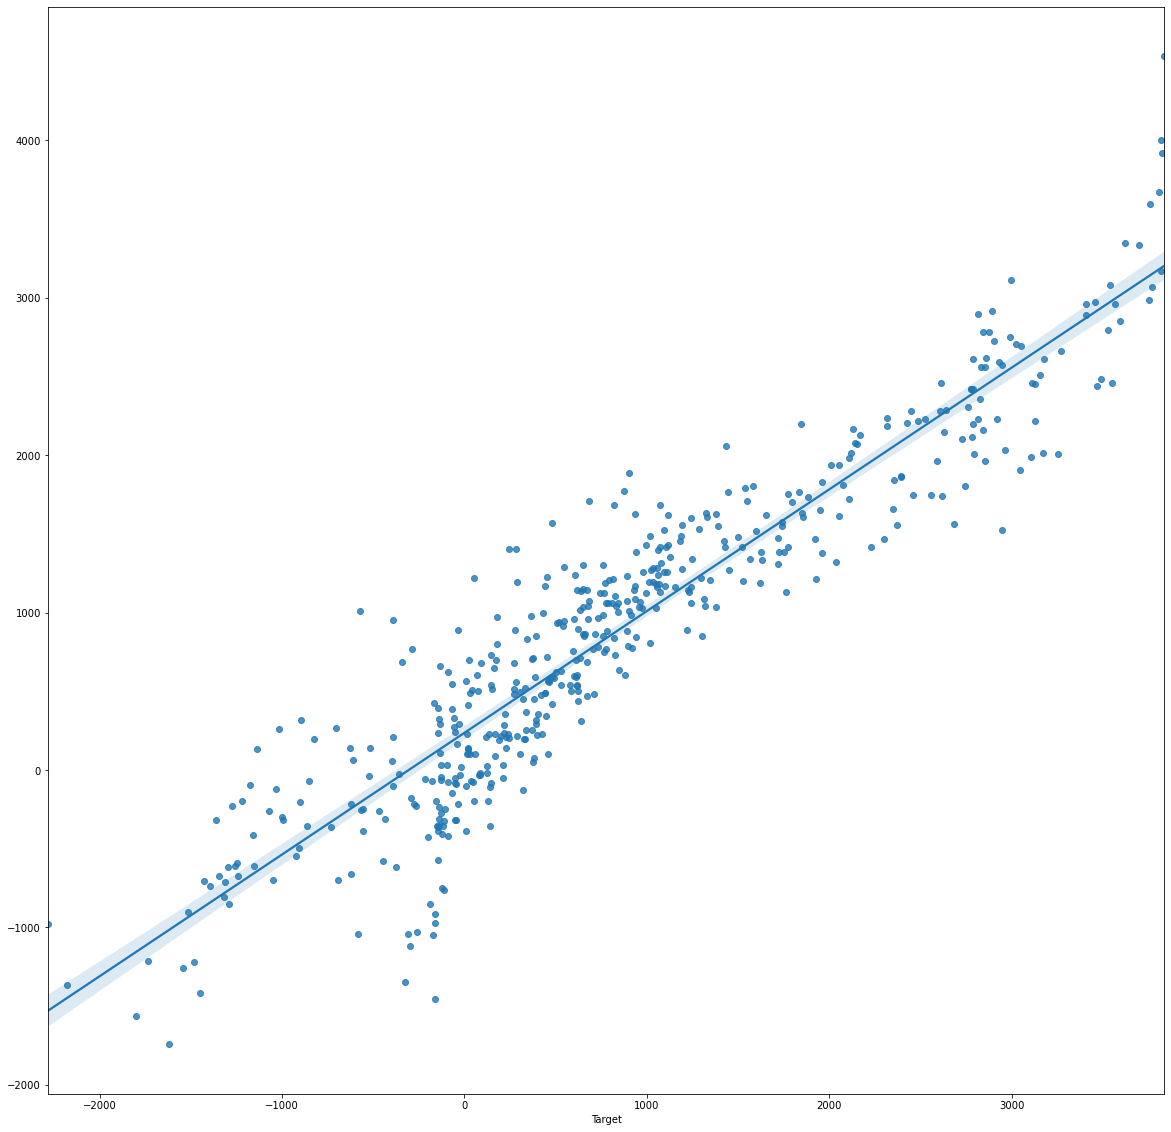

In [15]:
plot.subplots(figsize = (20,20))
sea_b.regplot(Train_datasplit_out,Gradient_Boosting_Regression_Predictions_Train)

plot.subplots(figsize = (20,20))
sea_b.regplot(Train_datasplit_testout,Gradient_Boosting_Regression_Predictions_Test)

## Conclusion

Upon going through the values and the plots we can conclude that the best ML technique out of the four is determined to be the Gradient Boosting Regression. We will be carrying this model forward to predict the out out for the test data.

### Part B

In [16]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

#======================================================================================
cleanup = {"F5": {"Very low":0, "Low":1, "Medium":2, "High":3, "Very high":4},
          "F34": {"USA":0, "Europe":1, "UK":2, "Rest":3}
          }

test_data.replace(cleanup, inplace=True)
#======================================================================================

test_data.info()

predicted = Gradient_Boosting_Regression.predict(test_data)


# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   int64  
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  